# Linear Regression
Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.

In [1]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read and explore data

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tsh,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
df.describe().round(0)

,age,sex,bmi,map,tc,ldl,hdl,tsh,ltg,glu,y
count,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0
mean,49.0,1.0,26.0,95.0,189.0,115.0,50.0,4.0,5.0,91.0,152.0
std,13.0,0.0,4.0,14.0,35.0,30.0,13.0,1.0,1.0,11.0,77.0
min,19.0,1.0,18.0,62.0,97.0,42.0,22.0,2.0,3.0,58.0,25.0
25%,38.0,1.0,23.0,84.0,164.0,96.0,40.0,3.0,4.0,83.0,87.0
50%,50.0,1.0,26.0,93.0,186.0,113.0,48.0,4.0,5.0,91.0,140.0
75%,59.0,2.0,29.0,105.0,210.0,134.0,58.0,5.0,5.0,98.0,212.0
max,79.0,2.0,42.0,133.0,301.0,242.0,99.0,9.0,6.0,124.0,346.0


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tsh', 'ltg', 'glu',
       'y'],
      dtype='object')

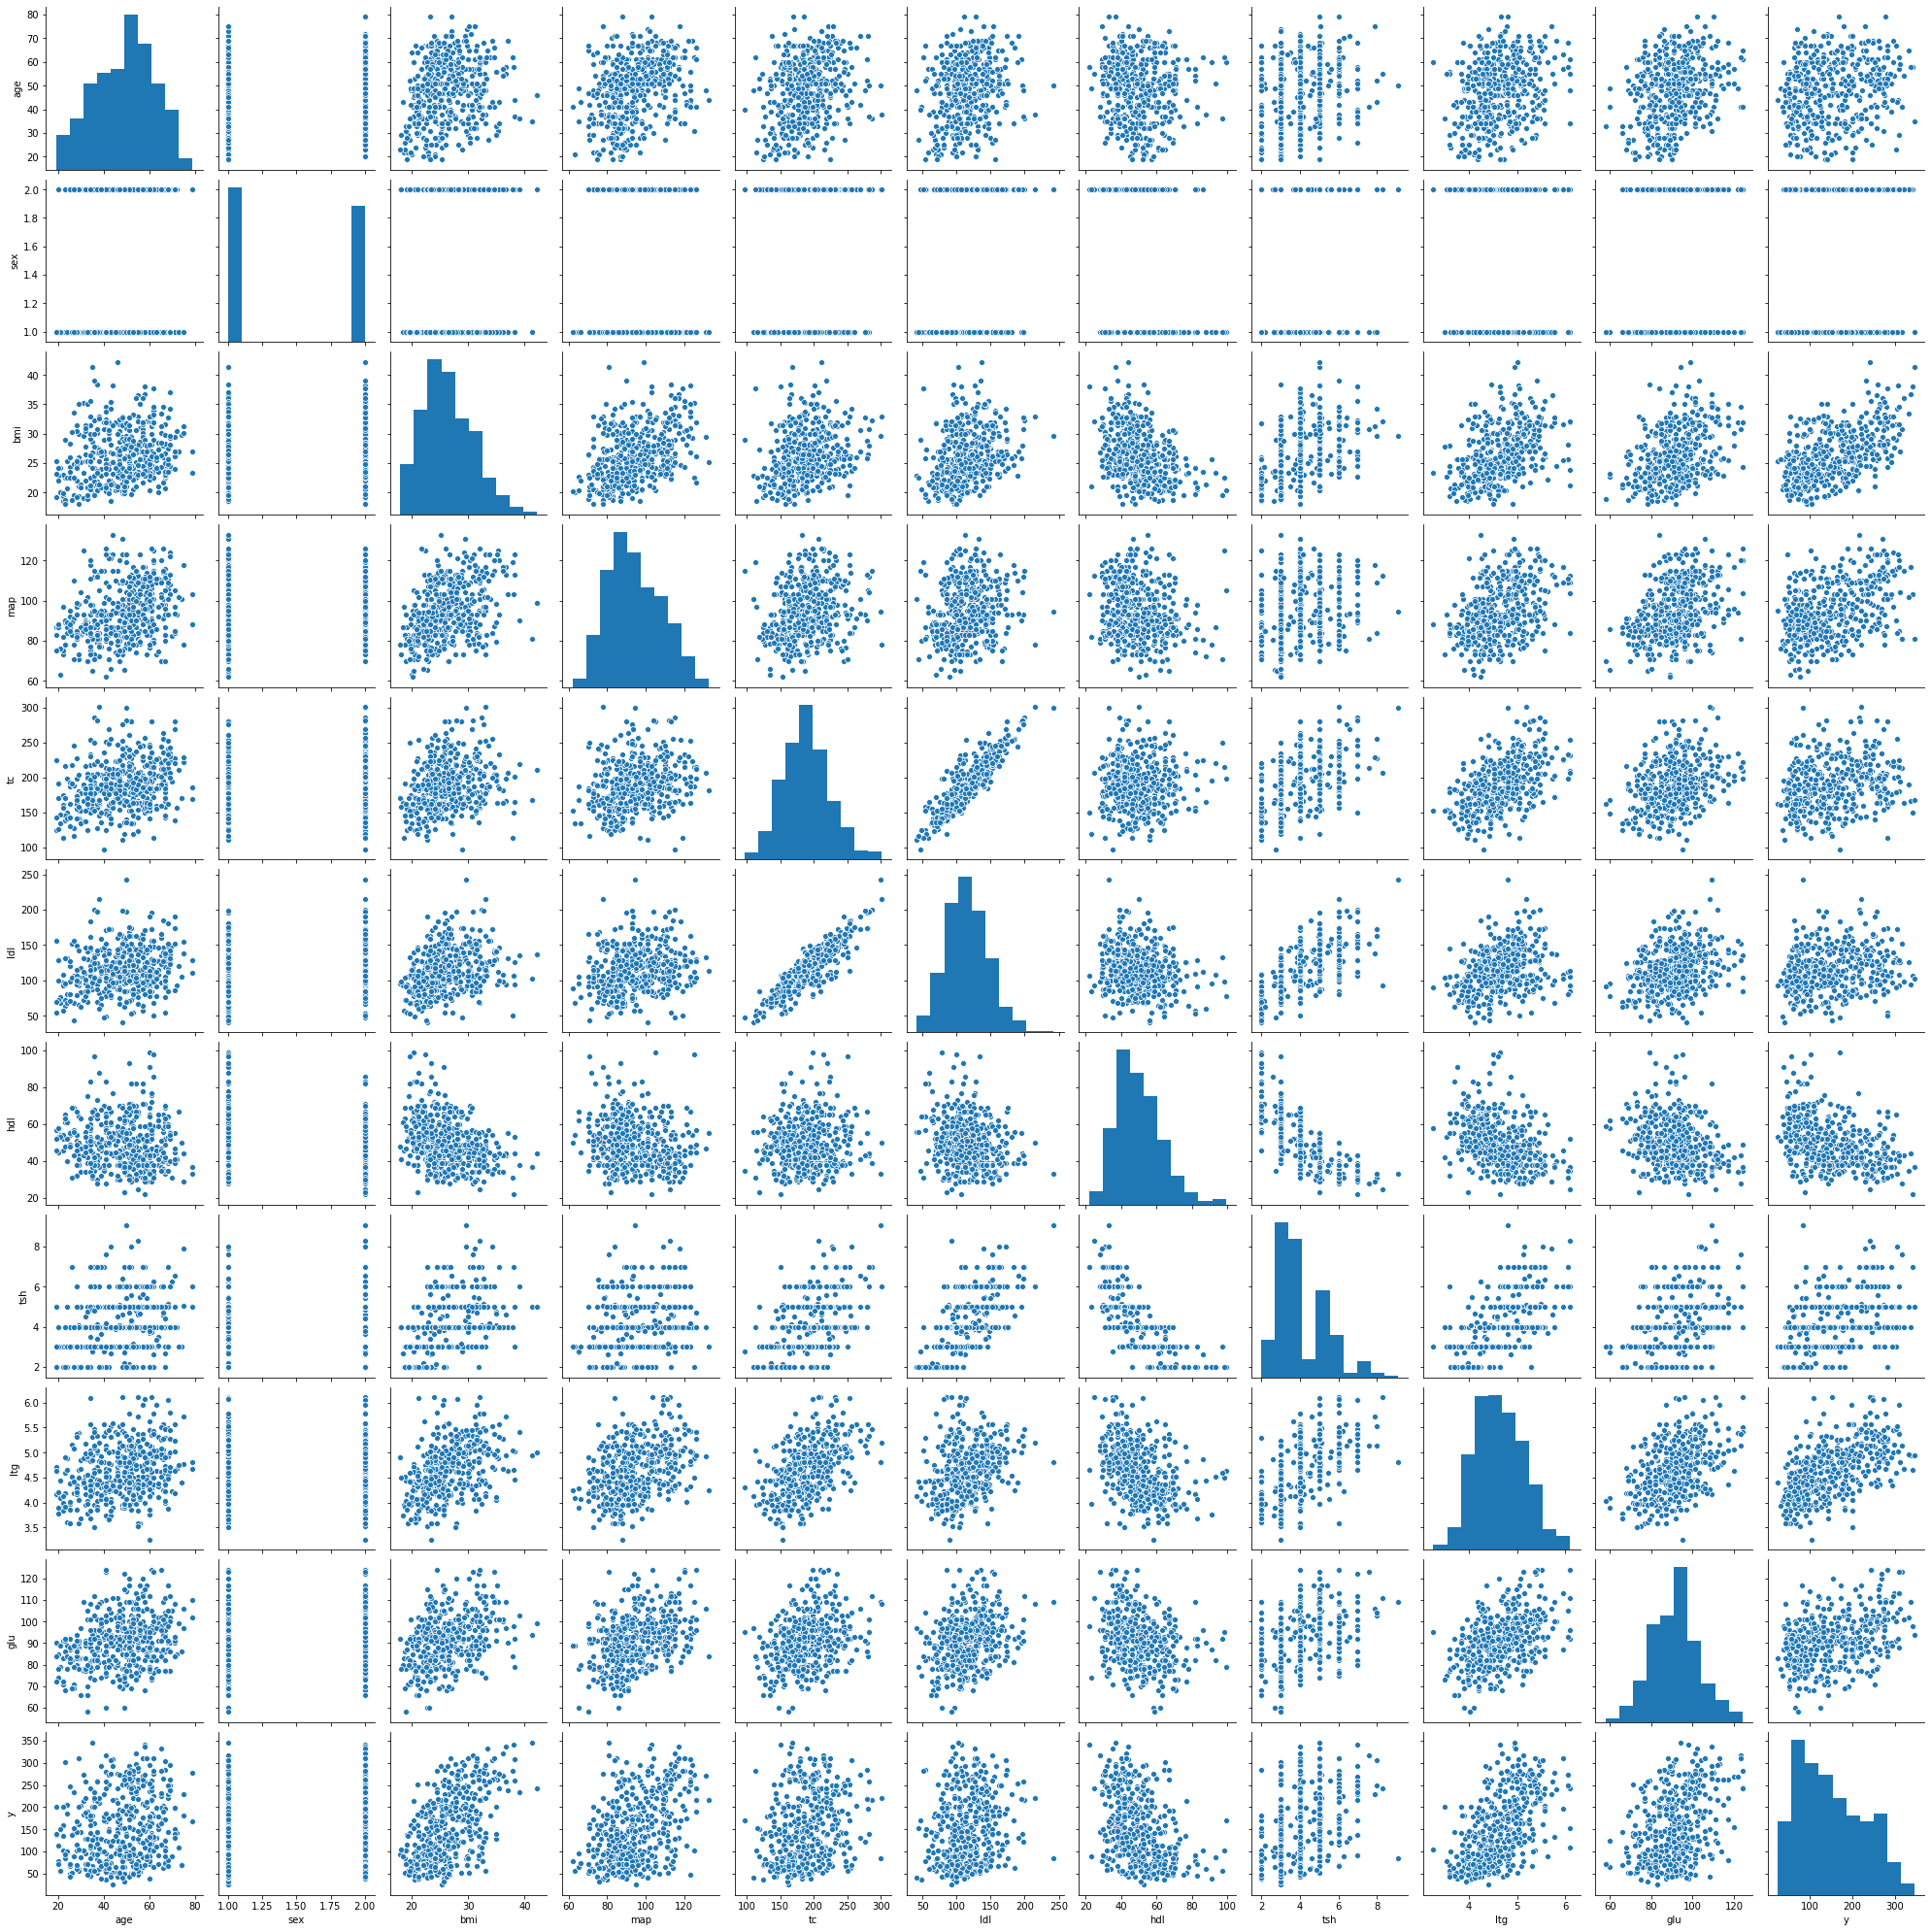

In [6]:
sns.pairplot(df)

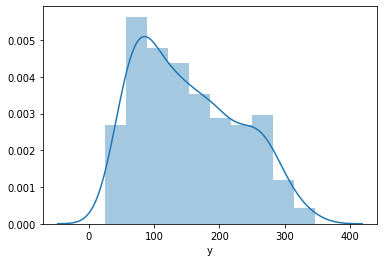

In [7]:
sns.distplot(df['y'])

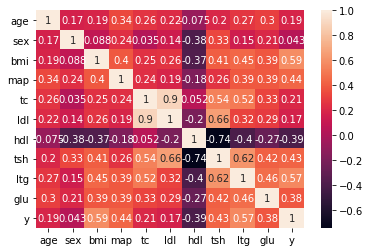

In [8]:
sns.heatmap(df.corr(), annot = True)

### Train the model
We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

In [9]:
# X and Y arrays
X = df[['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tsh', 'ltg', 'glu']]
y = df['y']

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#model evaluation
print(lm.intercept_)

-279.32657536848853


In [15]:
lm.coef_

array([-2.91459646e-02, -2.94391147e+01,  6.29051473e+00,  1.03282342e+00,
       -4.96257411e-01,  1.48928595e-01, -3.42524380e-01,  4.36022824e+00,
        6.03555983e+01,  1.08018092e-01])

In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-0.029146
sex,-29.439115
bmi,6.290515
map,1.032823
tc,-0.496257
ldl,0.148929
hdl,-0.342524
tsh,4.360228
ltg,60.355598
glu,0.108018


Interpreting the coefficients:
<br>Holding all other features fixed, a 1 unit increase in...
<br>    ...**AGE** is associated with a **reduction of 0.03** in diabetes.
<br>    ...**SEX** (male/female) is associated with a **reduction of 29.44**** in diabetes.
<br>    ...**BMI** (Body Mass Index) is associated with an **increase of 6.29** in diabetes.
<br>    ...**MAP** (Mean Arterial Pressure) is associated with an **increase of 1.03** in diabetes.
<br>    ...**TC**  (Total Count or the number of white blood cells) is associated with a **reduction of 0.50** in diabetes.
<br>    ...**LDL** (Low-Density Lipoprotein cholesterol) is associated with an **increase of 0.15** in diabetes.
<br>    ...**HDL** (High-Density Lipoprotein cholesterol) is associated with a **reduction of 0.34** in diabetes.
<br>    ...**TSH** (Thyroid Stimulating Hormone) is associated with an **increase of 4.36** in diabetes.
<br>    ...**LGT** (Limulus Gelation Test) is associated with an **increase of 60.35** in diabetes.
<br>    ...**GLU** (GLUcose) is associated with an **increase of 0.11** in diabetes.

### Predictions

In [14]:
predictions = lm.predict(X_test)

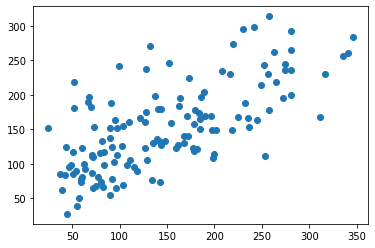

In [15]:
plt.scatter(y_test,predictions)

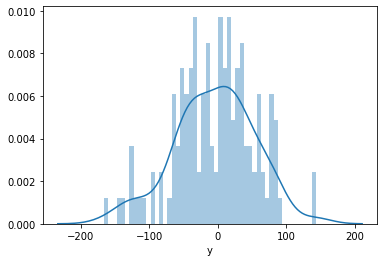

In [16]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R² Error** (RMSE) is Coefficient of Determination:

![image](https://miro.medium.com/max/1252/0*_Bk3m941thWlveS3.png)

**Adjusted R²** (RMSE) is the square root of the mean of the squared errors:

![image](https://miro.medium.com/max/792/0*WkdWEm2993yhYvUA.png)

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** the constant baseline is chosen by taking the mean of the data and drawing a line at the mean (always be less than or equal to 1).
- **R2 adjusted** R² suffers from the problem that the scores improve on increasing terms even though the model is not improving which may misguide the researcher. Adjusted R² is always lower than R² as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.

All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn import metrics

In [22]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 46.02194652078081
MSE: 3365.0818482905443
RMSE: 58.009325528664306


In [23]:
print(min(df['y']))
print(max(df['y']))
print(max(df['y']) - min(df['y']))

25
346
321


In [26]:
print('MAE:',MAE/ (max(df['y']) - min(df['y'])))
print('RMSE:',RMSE/(max(df['y']) - min(df['y'])))

MAE: 0.1433705499089745
RMSE: 0.1807144097466178
